In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_excel("C:\\Users\\SAI BABA\\Desktop\\avocado.xlsx")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#will drop column unnamed:0 as it has not that much importance 
data.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
data.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#checking the total rows and total columns
data.shape

(18249, 13)

In [6]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   PLU_4046      18249 non-null  float64       
 4   PLU_4225      18249 non-null  float64       
 5   PLU_4770      18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [8]:
#Extract the Month from DOB into separate column
data['Month'] = pd.DatetimeIndex(data['Date']).month
data.head()


,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [9]:
#Extract the Date from DOB into separate column
data['Date'] = pd.DatetimeIndex(data['Date']).day
data.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [10]:
#checking the value counts of each date
data.Date.value_counts()

11    756
4     756
18    755
25    755
8     648
12    648
24    648
1     648
26    648
22    648
5     648
19    648
3     648
15    648
17    648
10    648
27    540
28    540
7     540
14    540
29    540
21    540
20    540
13    540
6     539
30    432
16    432
9     432
23    432
2     432
31    432
Name: Date, dtype: int64

In [11]:
#checking the value counts of each type
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [12]:
#will check co-relation of total volume to total bag
data[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


In [13]:
#now checking the average year of volume of avacado per year
data.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

In [14]:
#checking the organic type of avacado 
organic = data[data['type'] == 'organic']
organic

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
9126,27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany,12
9127,20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany,12
9128,13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany,12
9129,6,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany,12
9130,29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [15]:
#check the mean of price at each year of organic type of avacado
organic.groupby('year')['AveragePrice'].mean()

year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

In [16]:
#finding how much type of avacado is sell in last 4 year
data.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [17]:
#total no of sale in each year of  4 years
data.groupby('year')['Total Volume'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   PLU_4046      18249 non-null  float64
 4   PLU_4225      18249 non-null  float64
 5   PLU_4770      18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


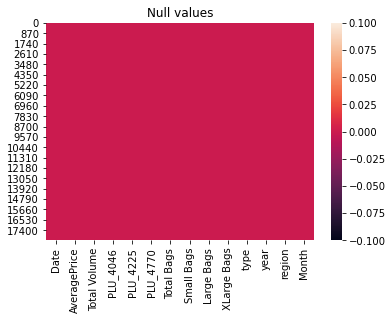

In [19]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [20]:
data.describe()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,15.662612,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,8.776281,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,8.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,16.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,23.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,31.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


Above statatics data show that there multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

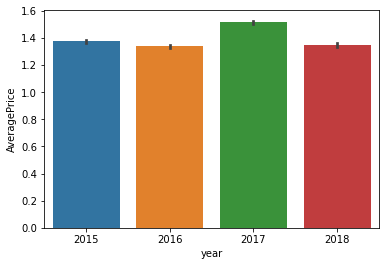

In [21]:
#check ratio of year and price that which year had max average price
sns.barplot(x = "year" , y = "AveragePrice" ,data=data )

so  graph showing that 2017 year is that year where max average price is there

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

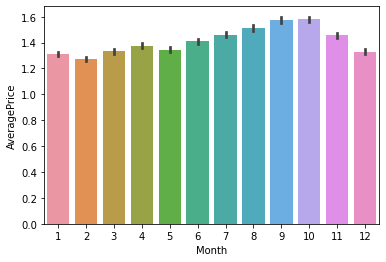

In [22]:
#check ratio of month and price that which year had max average price
sns.barplot(x = "Month" , y = "AveragePrice" ,data=data )

sept and october is the month where max no average price is there

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

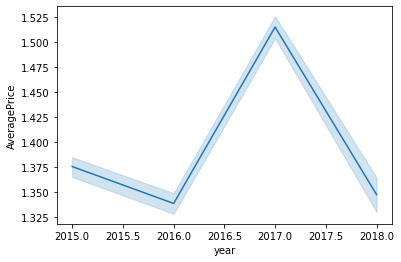

In [23]:
sns.lineplot(x = 'year', y = 'AveragePrice', data=data)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

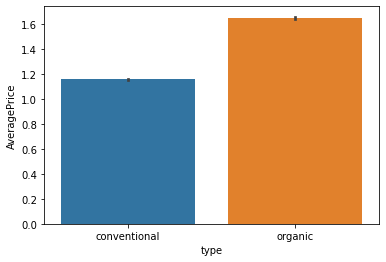

In [24]:
#checking ratio of type and price that which year had max average price
sns.barplot(x = "type" , y = "AveragePrice" ,data=data )

organic has more price per unit than conventional

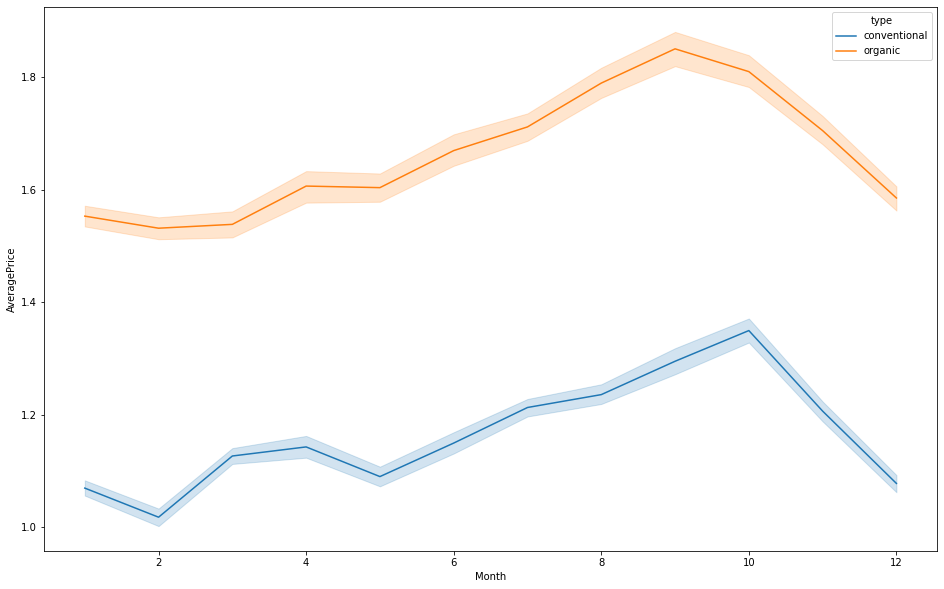

In [25]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=data)
plt.show()

Text(0.5, 1.0, 'ration of Price and Region')

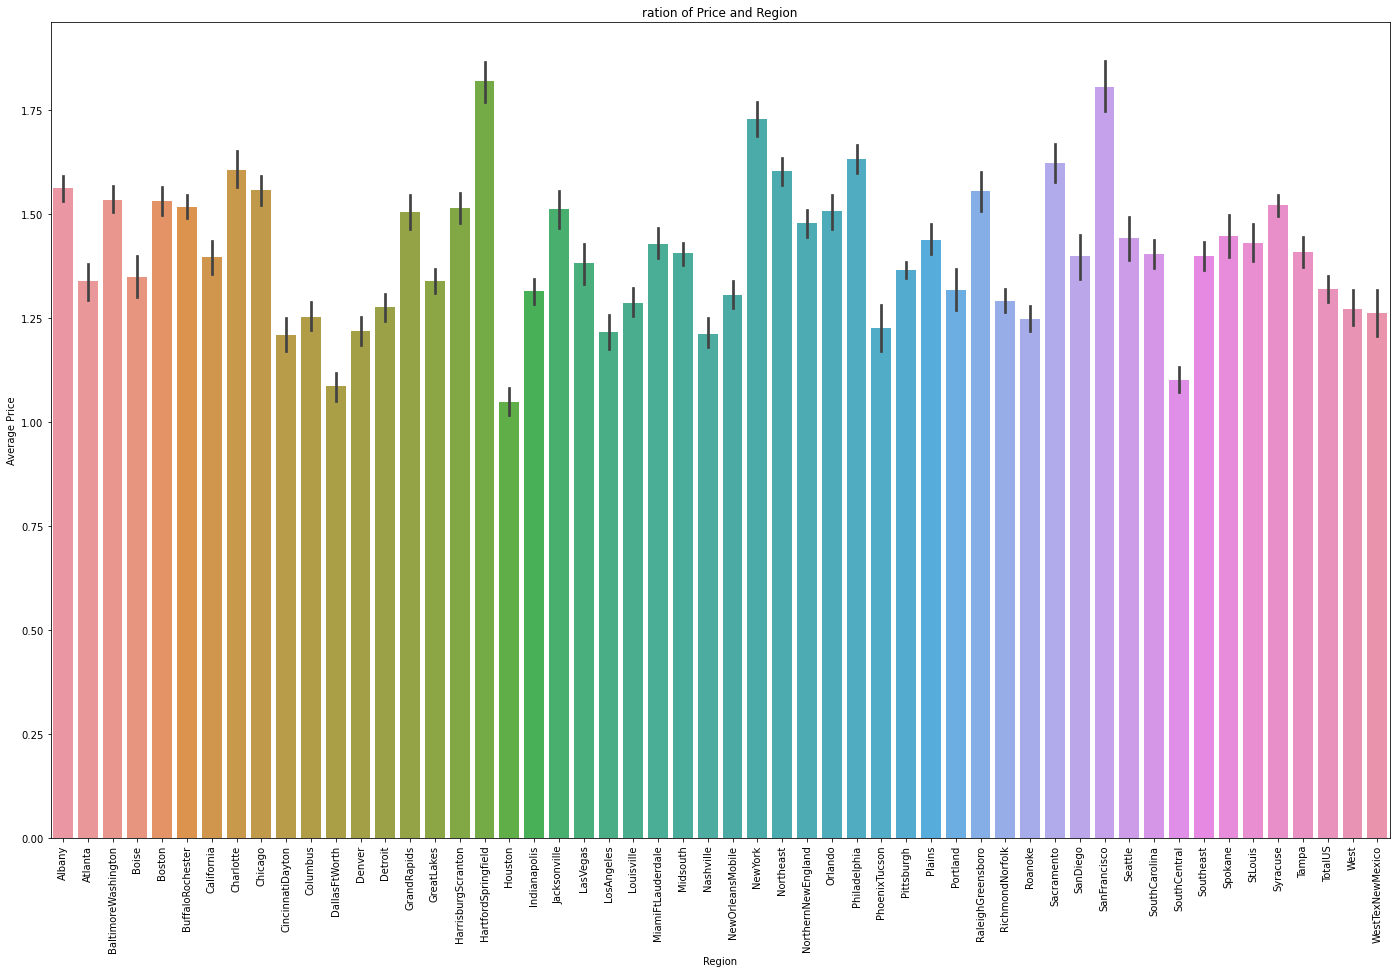

In [26]:
plt.figure(figsize=(24,15))
sns.barplot(x='region',y='AveragePrice',data=data)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('ration of Price and Region')

above graph is showing that HartfordSpringfield ,SanFrancisco and NewYork are having more average price as compared to other region

Text(0.5, 1.0, 'Average_Price')

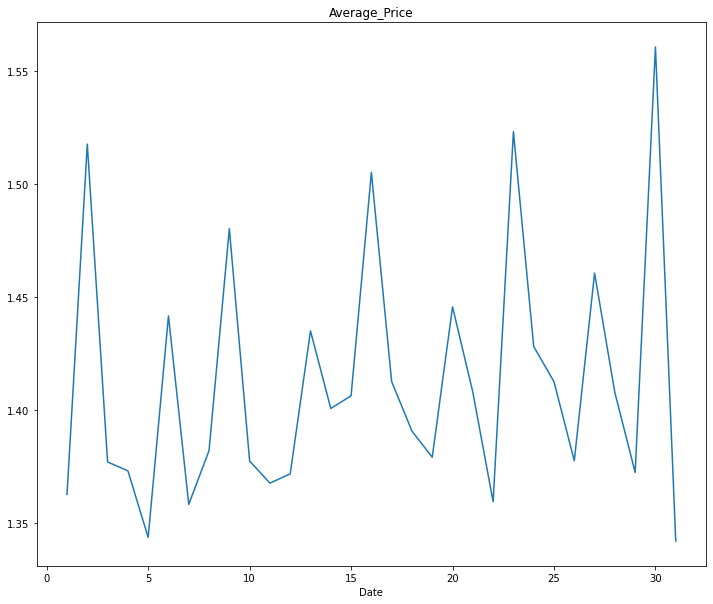

In [27]:
date=data.groupby('Date').mean()
plt.figure(figsize=(12,10))
date['AveragePrice'].plot()
plt.title('Average_Price')

showing on date 28,29 and 30 the price of avacado is high

Text(0.5, 1.0, 'Average_Price')

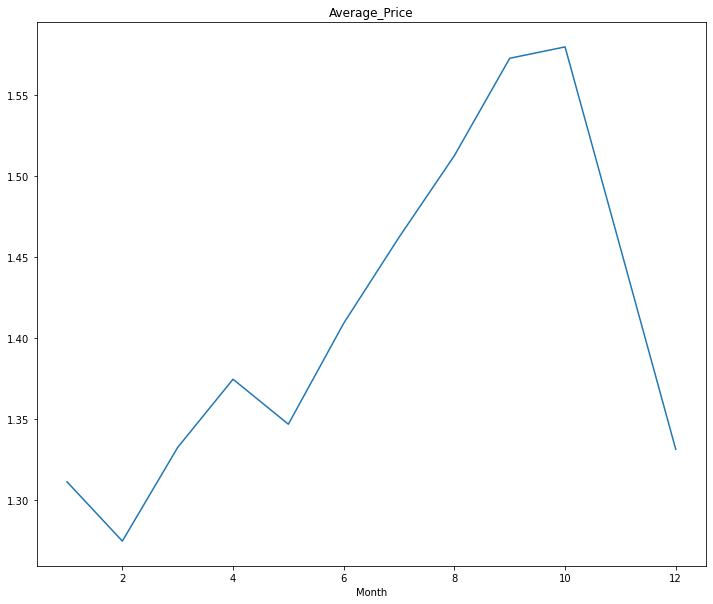

In [28]:
month=data.groupby('Month').mean()
plt.figure(figsize=(12,10))
month['AveragePrice'].plot()
plt.title('Average_Price')

 between august to october the price of avacado is much higher as comapared to other month

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'PLU_4046'}>],
       [<AxesSubplot:title={'center':'PLU_4225'}>,
        <AxesSubplot:title={'center':'PLU_4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

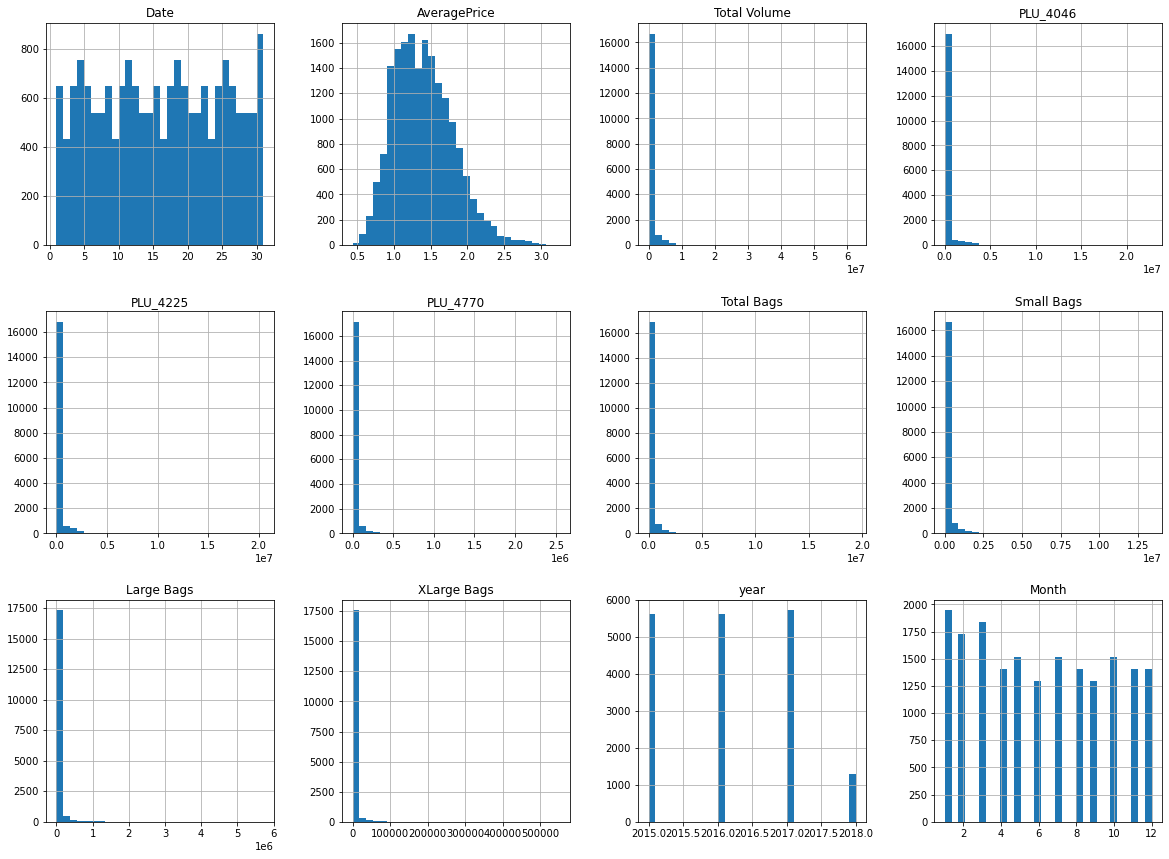

In [29]:
# lets will plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [30]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [31]:
#will convert categorical data into numercial for better EDA
column = ['type','region']
le = LabelEncoder()
for i in column:
    data[i] = le.fit_transform(data[i].astype(str))

In [32]:
print(data.dtypes)

Date              int64
AveragePrice    float64
Total Volume    float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
dtype: object


In [33]:
data.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


In [34]:
data.type=data.type.astype(float)

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
PLU_4046         AxesSubplot(0.606034,0.71587;0.133621x0.16413)
PLU_4225         AxesSubplot(0.766379,0.71587;0.133621x0.16413)
PLU_4770           AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
type               AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
region           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Month           AxesSubplot(0.606034,0.321957;0.133621x0.16413)
dtype: object

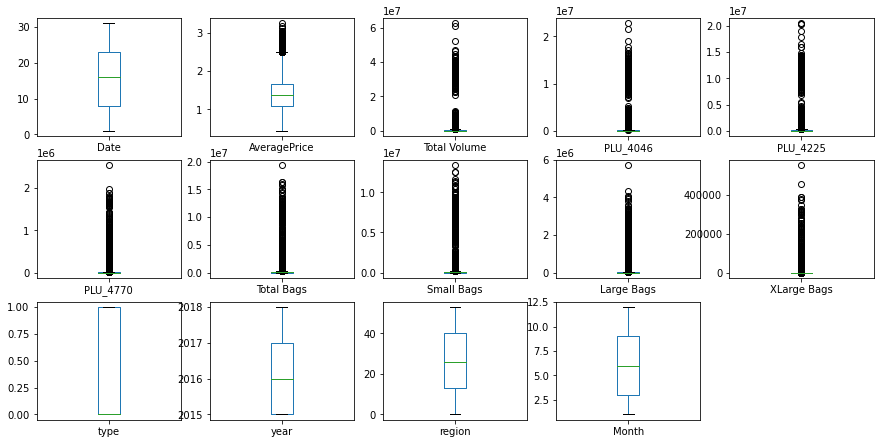

In [35]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [36]:
#calculate the zscore
z = np.abs(zscore(data))
print(z)

[[1.29185687 0.18868864 0.22771641 ... 1.22128204 1.7002522  1.64763162]
 [0.49423066 0.13901962 0.23042664 ... 1.22128204 1.7002522  1.64763162]
 [0.30339555 1.18206895 0.21208462 ... 1.22128204 1.7002522  1.64763162]
 ...
 [0.60817726 1.15237477 0.24233073 ... 1.97050371 1.70081131 1.46495942]
 [0.18944895 1.30138182 0.24162464 ... 1.97050371 1.70081131 1.46495942]
 [0.98707516 0.53151208 0.24125273 ... 1.97050371 1.70081131 1.46495942]]


[]

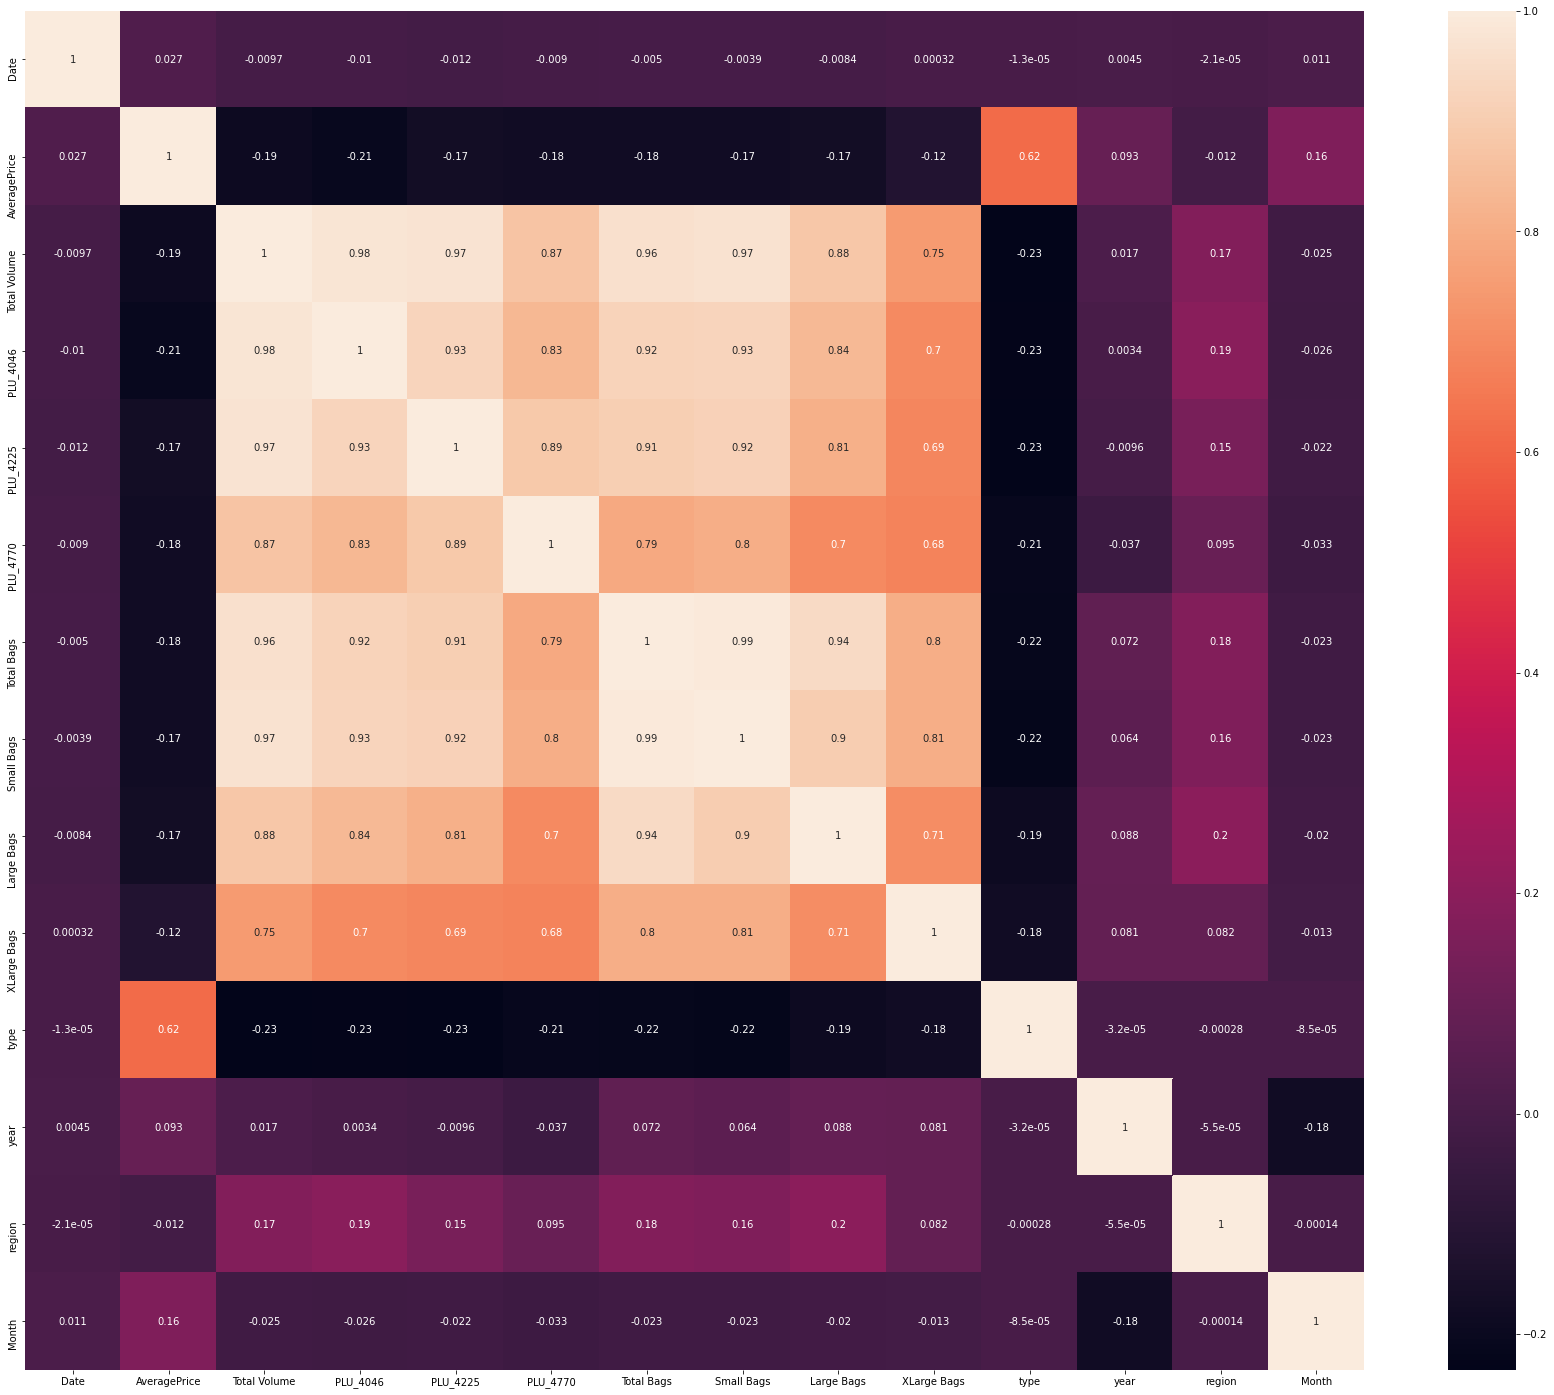

In [37]:
#checking the co-relation of all column to each other
data_cor = data.corr()
plt.figure(figsize=(30,25))
sns.heatmap(data_cor,annot=True)
plt.plot()

as year is most negative co related column among all columns and also the difference is very close of each column

In [38]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [39]:
#Assign the value to df_new which are less the threshold value and removing the outliers
data_new=data[(z<3).all(axis = 1)]

In [40]:
print(data.shape)
print(data_new.shape)
data = data_new
print('Shape after removing outlires',data.shape)

(18249, 14)
(17651, 14)
Shape after removing outlires (17651, 14)


In [41]:
#now finding the mean value of each column 
print(data['PLU_4225'].mean())
print(data['Total Bags'].mean())
print(data['Small Bags'].mean())

165600.94489433893
129816.01636961184
100628.33843918175


In [42]:
#replace the outlier value to its mean value to remove outliers
data.loc[data['PLU_4225']<3,'PLU_4225'] = np.mean(data['PLU_4225'])
data.loc[data['Total Bags']<4.8,'Total Bags'] = np.mean(data['Total Bags'])
data.loc[data['Small Bags']<4,'Small Bags'] = np.mean(data['Small Bags'])

In [43]:
print(data.shape)
print(data_new.shape)
data = data_new
print('Shape after removing outlires',data.shape)

(17651, 14)
(17651, 14)
Shape after removing outlires (17651, 14)


In [44]:
data.skew()

Date            0.011778
AveragePrice    0.377432
Total Volume    3.767138
PLU_4046        4.909848
PLU_4225        4.455664
PLU_4770        5.117170
Total Bags      4.066780
Small Bags      4.222709
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

In [45]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Total Volume','PLU_4046','PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if data.skew().loc[col]>0.55:
        data[col] = np.log1p(data[col])

In [46]:
data.skew()

Date            0.011778
AveragePrice    0.377432
Total Volume   -0.049950
PLU_4046       -0.420273
PLU_4225       -0.503957
PLU_4770        0.068532
Total Bags     -0.319074
Small Bags     -0.435520
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'PLU_4046'}>],
       [<AxesSubplot:title={'center':'PLU_4225'}>,
        <AxesSubplot:title={'center':'PLU_4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

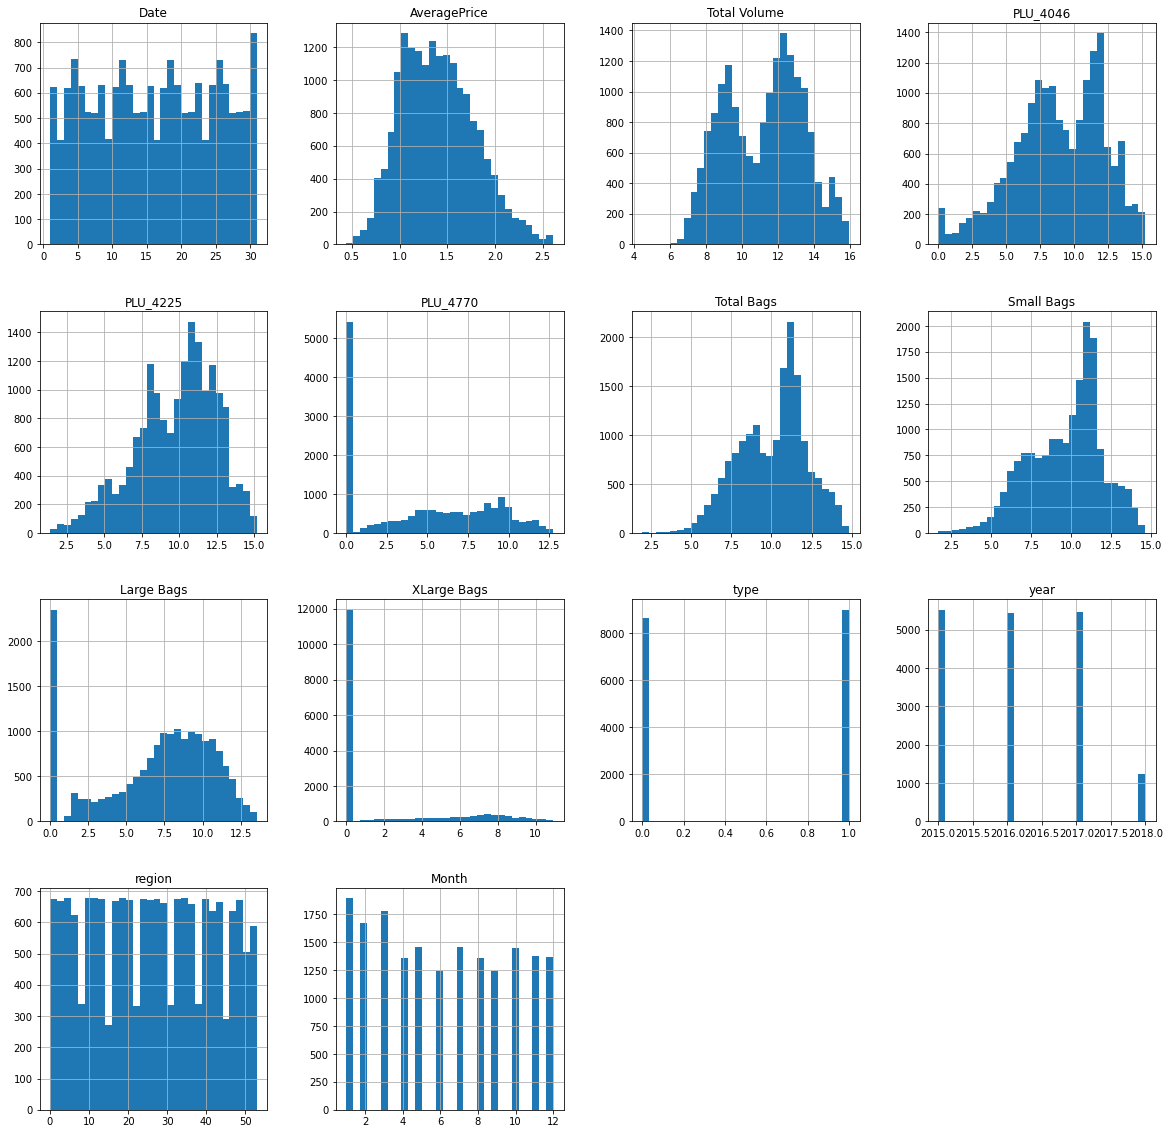

In [47]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

average price, total bags and total volume is well normally distributed data among all column

In [48]:
#assign the value of x and y for training and testing phase
x = data.drop(columns=['AveragePrice','Date'])
y = data[["AveragePrice"]]
print(x.shape)
print(y.shape)

(17651, 12)
(17651, 1)


Above we are using AveragePrice as output variable and used to do the prediction

In [49]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [50]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score correspond to random state  40 is 0.7561747091148194
R2 score correspond to random state  40 is 0.8374592350327745
R2 score correspond to random state  40 is 0.5588087288956934
R2 score correspond to random state  40 is 0.5449264326278505
R2 score correspond to random state  40 is 0.7503467423884156
R2 score correspond to random state  41 is 0.7333348452201169
R2 score correspond to random state  41 is 0.8281730760420748
R2 score correspond to random state  41 is 0.5288279141498933
R2 score correspond to random state  41 is 0.536287732197119
R2 score correspond to random state  41 is 0.7462086035627709
R2 score correspond to random state  42 is 0.7165693918426217
R2 score correspond to random state  42 is 0.8272814301920477
R2 score correspond to random state  42 is 0.560433893100609
R2 score correspond to random state  42 is 0.5428506636427378
R2 score correspond to random state  42 is 0.7404599605481431
R2 score correspond to random state  43 is 0.7128815882968852
R2 score c

In [51]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 85.27386628859234


In [52]:
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error:  0.10188154506437769
Mean squared Error:  0.022115442060085838
Root Mean Absolute Error:  0.3191888861855589


Text(0, 0.5, 'Predicted_Y')

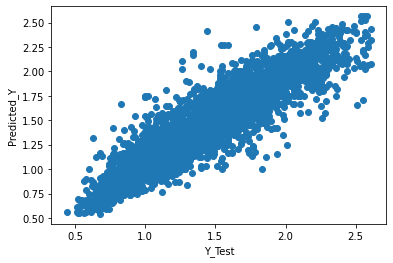

In [53]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

As above graph shown that it is predicting near to tha actual value and RMSE error is very less

In [54]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


In [55]:
#assign the value of x and y for training and testing phase
x_c = data.drop(columns=['region','Date'])
y_c = data[["region"]]
print(x_c.shape)
print(y_c.shape)


(17651, 12)
(17651, 1)


In [56]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

now we are taking region as output variable and try to prediction using classification method

In [57]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)
        

accuracy score correspond to random state  40 is 0.7864377682403434
accuracy score correspond to random state  40 is 0.7787124463519314
accuracy score correspond to random state  41 is 0.7766523605150215
accuracy score correspond to random state  41 is 0.783519313304721
accuracy score correspond to random state  42 is 0.7843776824034335
accuracy score correspond to random state  42 is 0.7809442060085837
accuracy score correspond to random state  43 is 0.7859227467811158
accuracy score correspond to random state  43 is 0.7783690987124463
accuracy score correspond to random state  44 is 0.7881545064377682
accuracy score correspond to random state  44 is 0.7788841201716739
accuracy score correspond to random state  45 is 0.7843776824034335
accuracy score correspond to random state  45 is 0.7866094420600859
accuracy score correspond to random state  46 is 0.7921030042918455
accuracy score correspond to random state  46 is 0.7933047210300429
accuracy score correspond to random state  47 is 

In [58]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 86,test_size = 0.33)
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [59]:
KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)

Accuracy Score : 83.84549356223175


In [60]:
#Calculating the scores of different parameters
score = cross_val_score(KNC,x_c,y_c,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Cross_val_score :  80.05164997431949
Mean Score      :  80.05164997431949
STD score       :  0.0


In [61]:
pred_prob = KNC.predict_proba(test_xc)[:,1]
pred_prob

array([0., 0., 1., ..., 0., 0., 0.])

In [62]:
fpr,tpr,thresholds = roc_curve(test_yc,pred_prob,pos_label=True)

In [63]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.00454625 1.        ]


[0.         0.75471698 1.        ]


[2. 1. 0.]


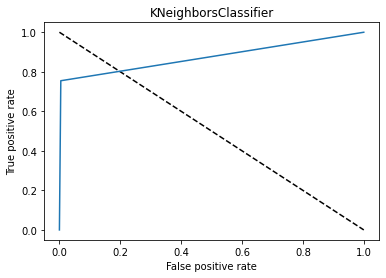

In [64]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

As from this data set we have following conclusion:

- taking price as y variable is predicting well for this model as comapared to region
- also r2 score value is also greater then accuracy score

In [65]:
import pickle

In [66]:
#saving model to the local file system
filename='finalized_model_avacado3.pickle'
pickle.dump(KNN,open(filename,'wb'))

In [67]:
filename

'finalized_model_avacado3.pickle'